# PREDICTING HOSPITAL READMISSION USING LOGISTIC REGRESSION 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Summary of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# Summary statistics
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
# Check for missing values
df.isnull().sum()/len(df)*100


encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburid

In [6]:
# Convert the integer columns to categorical type
df['admission_type_id'] = df['admission_type_id'].astype('object')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('object')
df['admission_source_id'] = df['admission_source_id'].astype('object')


In [7]:
df['readmitted']=df['readmitted'].replace(['NO','<30','>30'],['0','1','0'])
df['readmitted']=df['readmitted'].astype('int')

In [8]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [9]:
# List of columns to check for '?'
columns_to_check = ['diag_1', 'diag_2', 'diag_3', 'race']

# Drop rows where any of the specified columns contain '?'
df.drop(df[df[columns_to_check].isin(['?']).any(axis=1)].index, inplace=True)


In [10]:
df['gender'].value_counts()

Female             52833
Male               45219
Unknown/Invalid        1
Name: gender, dtype: int64

In [11]:
df.drop(df[df['gender'] == 'Unknown/Invalid'].index,inplace=True)

In [12]:
df['weight'].value_counts()
#The variable "weight" contains approximately 98% missing values, making it insignificant for analysis. 
#Therefore, decided to drop this variable.

?            95016
[75-100)      1276
[50-75)        850
[100-125)      594
[125-150)      136
[25-50)         90
[0-25)          43
[150-175)       34
[175-200)       10
>200             3
Name: weight, dtype: int64

In [13]:
drop_columns = [
    'encounter_id',
    'patient_nbr',
    'payer_code',
    'medical_specialty',
    'weight'
]

df.drop(columns=drop_columns, inplace=True)
#Some columns like 'encounter_id', 'patient_nbr','payer_code','medical_specialty', and 'weight' were dropped because they weren’t relevant

In [14]:
df['age'].value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [15]:
age_id = {'[0-10)':5, 
          '[10-20)':15, 
          '[20-30)':25, 
          '[30-40)':35, 
          '[40-50)':45, 
          '[50-60)':55,
          '[60-70)':65, 
          '[70-80)':75, 
          '[80-90)':85, 
          '[90-100)':95}
df['age_group'] = df.age.replace(age_id)

In [16]:
df['age_group'].value_counts()
# Age groups were converted into numeric midpoints to make them more useful for the model. 

75    25305
65    21809
85    16702
55    16697
45     9265
35     3548
95     2717
25     1478
15      466
5        65
Name: age_group, dtype: int64

In [17]:
df=df.drop(['age'],axis=1)

In [18]:
# variables (drugs named citoglipton and examide), all records have the same value. 
#So essentially these cannot provide any interpretive or discriminatory information for predicting readmission 
#so we decided to drop these two variables

In [19]:
df['citoglipton'].unique()

array(['No'], dtype=object)

In [20]:
df['examide'].unique()

array(['No'], dtype=object)

In [21]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [22]:
df.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group
1,Caucasian,Female,1,1,7,3,59,0,18,0,...,Up,No,No,No,No,No,Ch,Yes,0,15
2,AfricanAmerican,Female,1,1,7,2,11,5,13,2,...,No,No,No,No,No,No,No,Yes,0,25
3,Caucasian,Male,1,1,7,2,44,1,16,0,...,Up,No,No,No,No,No,Ch,Yes,0,35
4,Caucasian,Male,1,1,7,1,51,0,8,0,...,Steady,No,No,No,No,No,Ch,Yes,0,45
5,Caucasian,Male,2,1,2,3,31,6,16,0,...,Steady,No,No,No,No,No,No,Yes,0,55


# Univariate and Bivariate Data Analysis

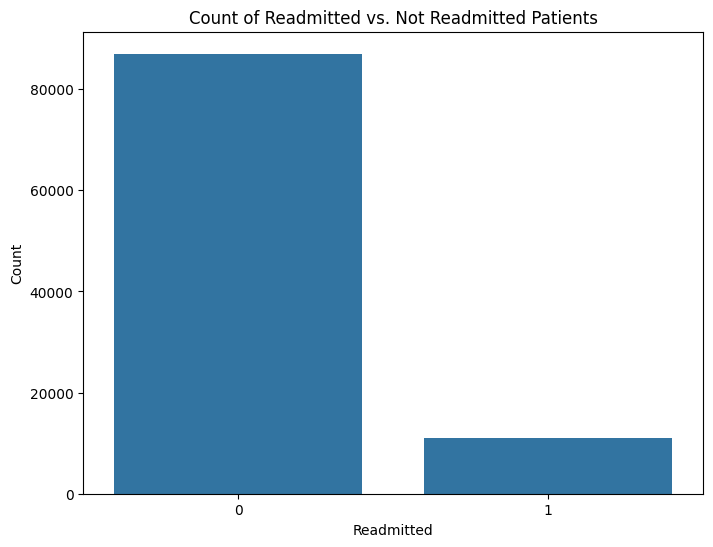

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=df)
plt.title('Count of Readmitted vs. Not Readmitted Patients')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='age_group', ylabel='count'>

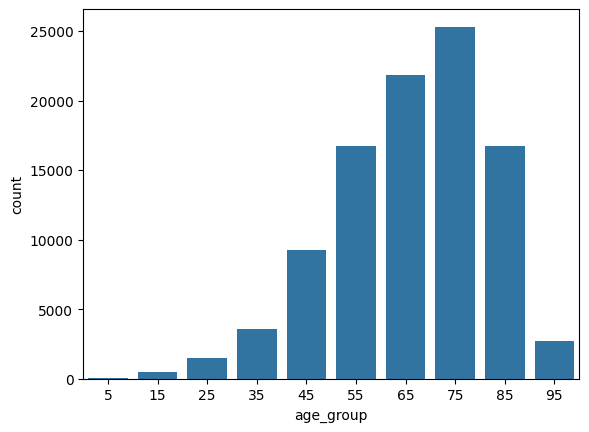

In [24]:
sns.countplot(x="age_group", data = df)

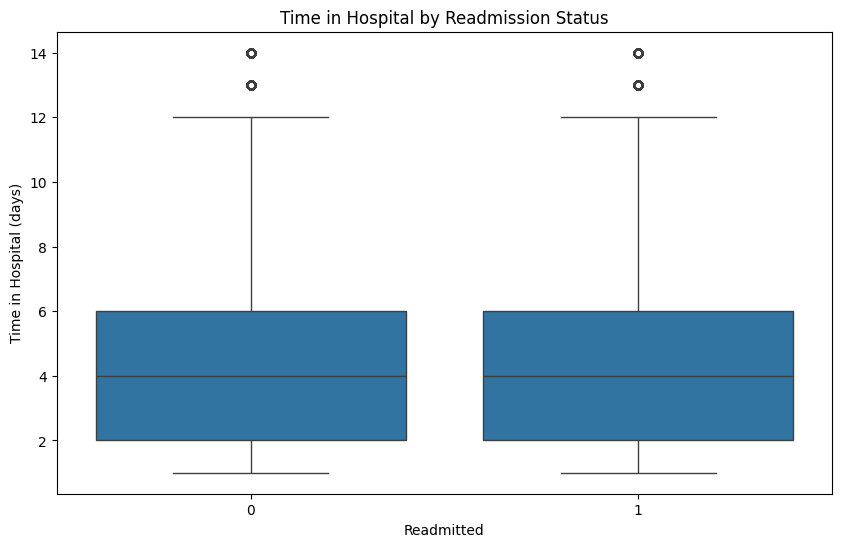

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Time in Hospital by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital (days)')
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_17628\2423057338.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


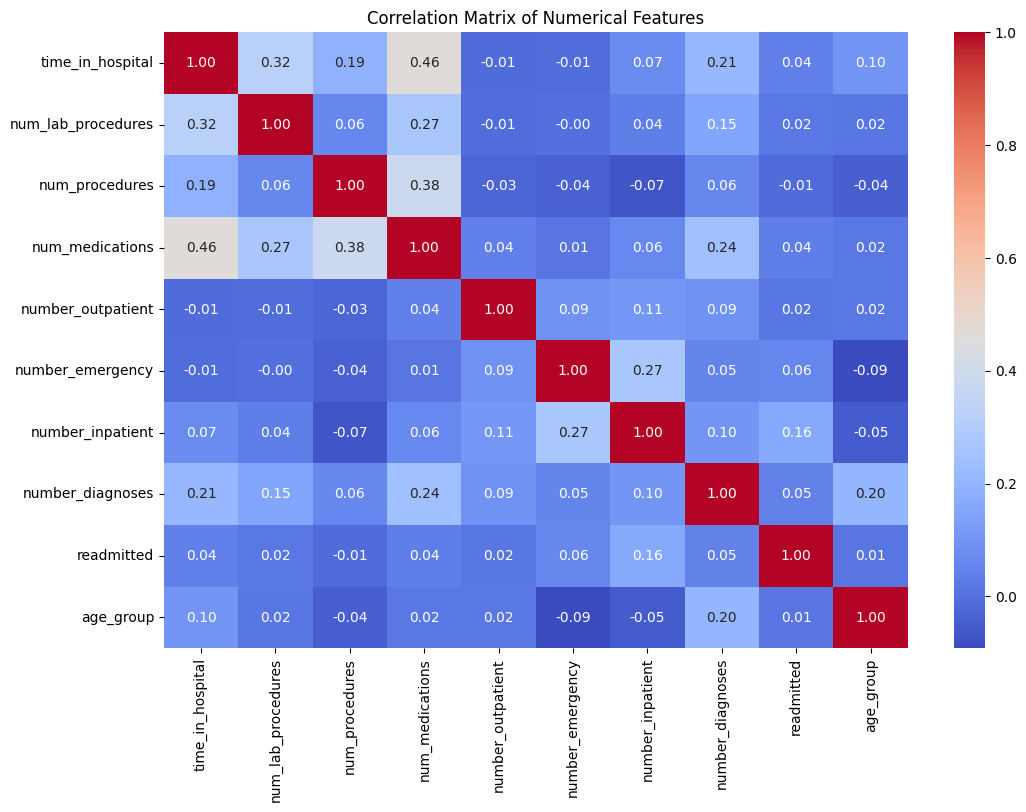

In [26]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


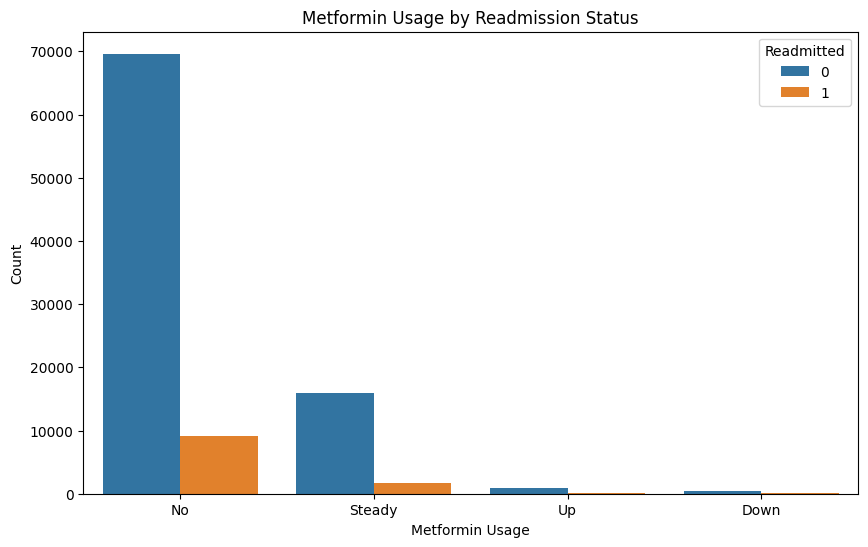

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='metformin', hue='readmitted', data=df)
plt.title('Metformin Usage by Readmission Status')
plt.xlabel('Metformin Usage')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.show()


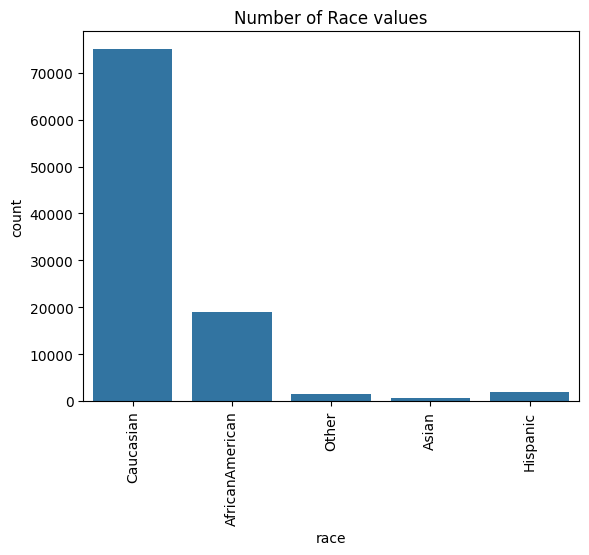

Proportion of Race
Caucasian          76.570595
AfricanAmerican    19.256109
Hispanic            2.023416
Other               1.512463
Asian               0.637417
Name: race, dtype: float64


In [28]:
sns.countplot(x=df['race'])
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)

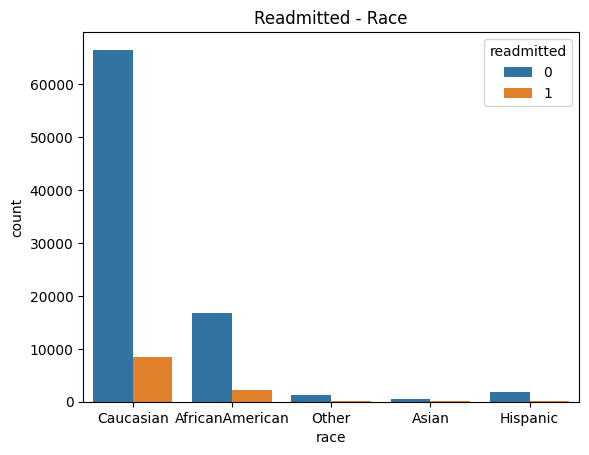

In [29]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

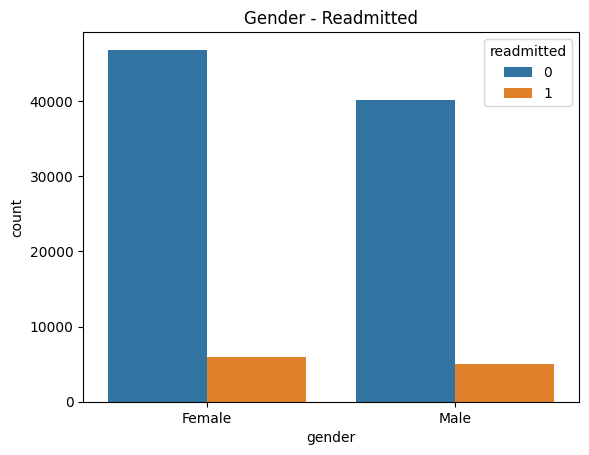

In [30]:
sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

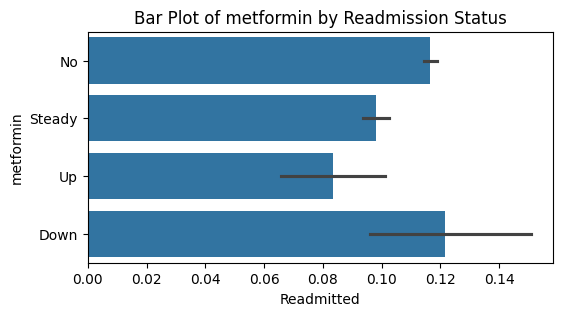

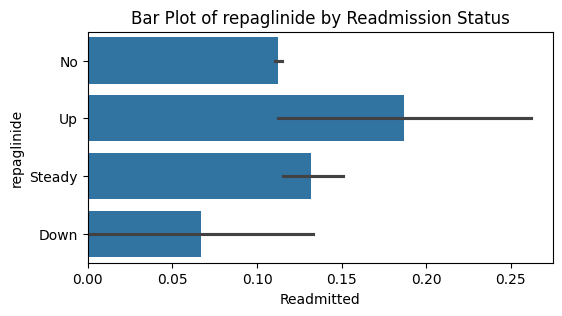

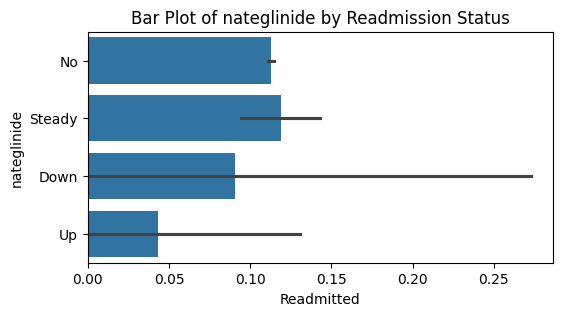

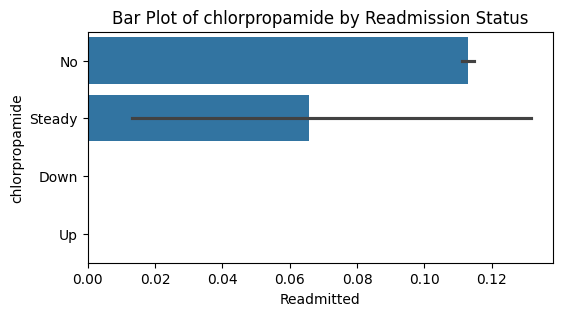

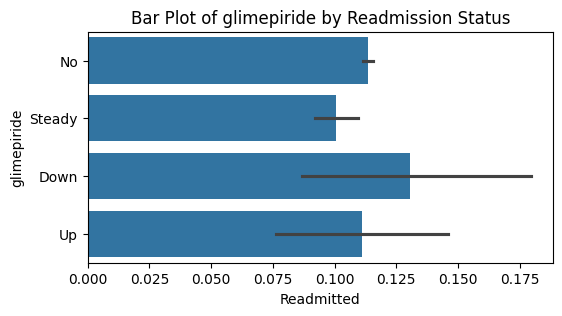

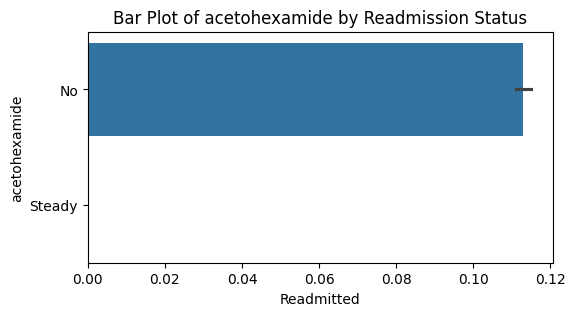

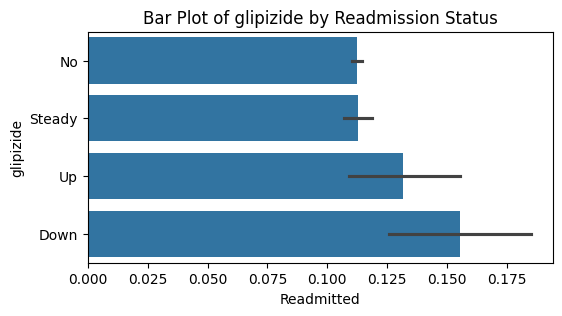

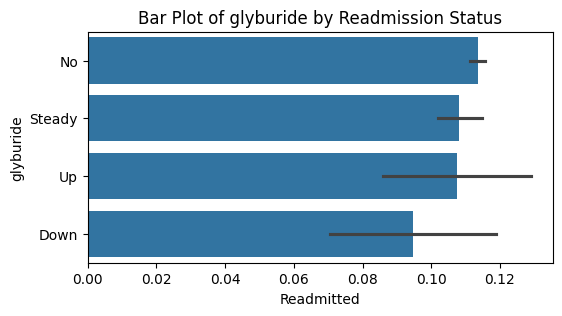

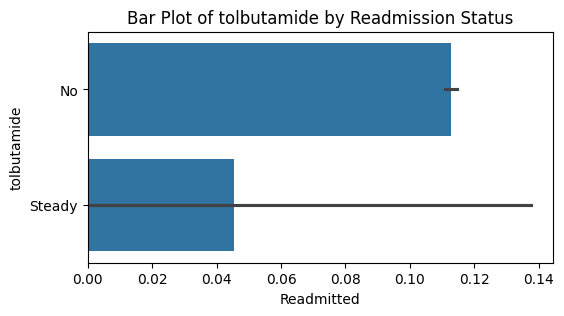

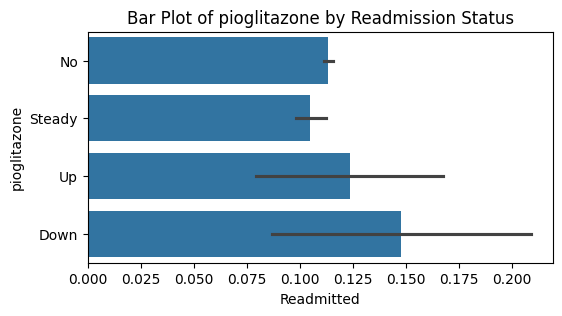

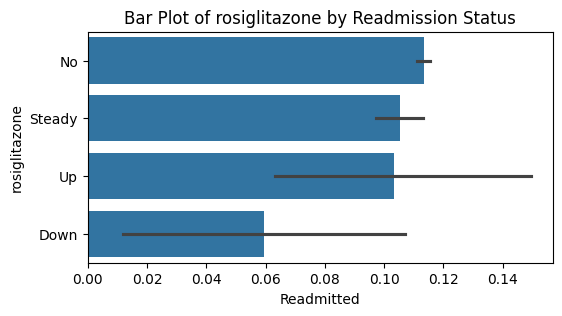

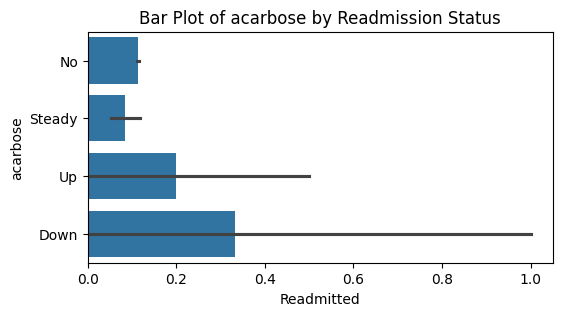

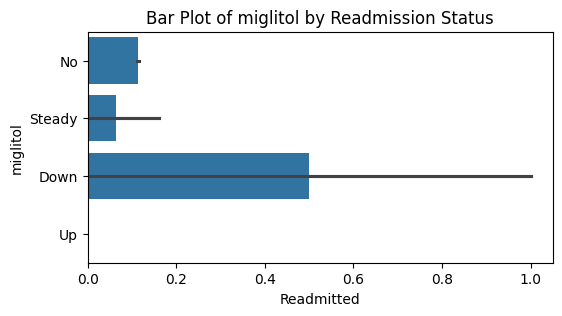

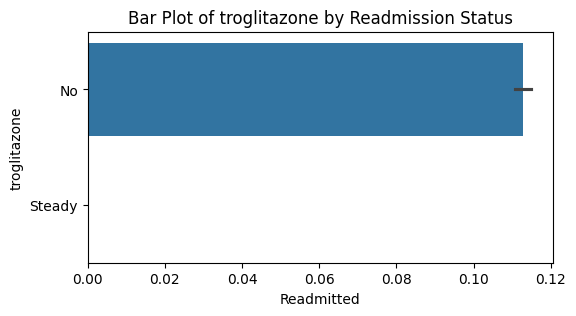

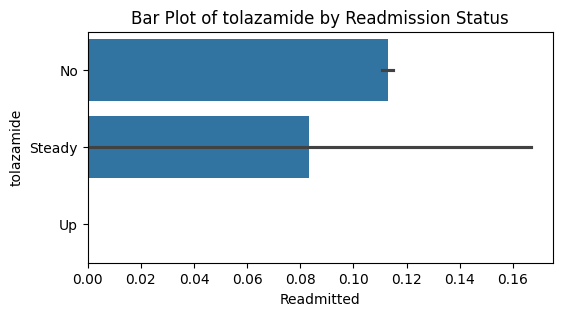

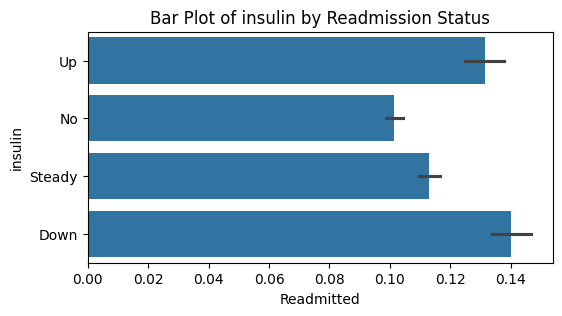

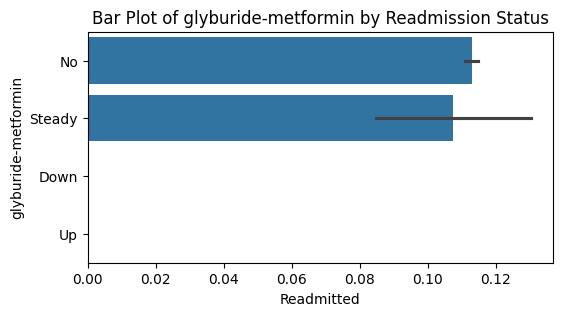

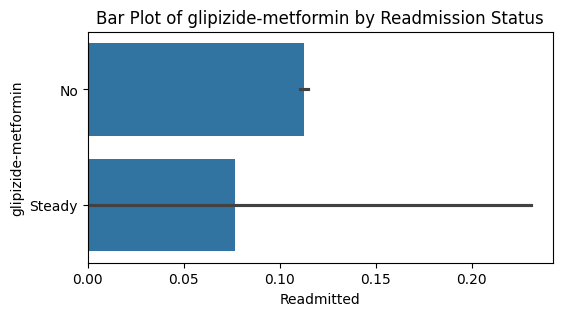

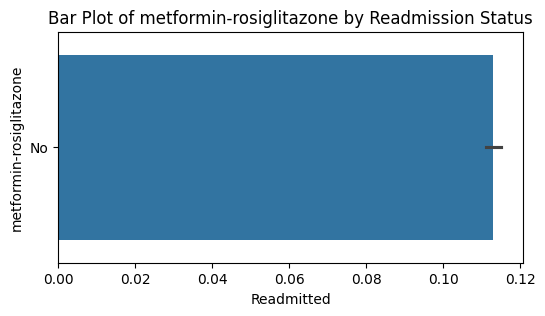

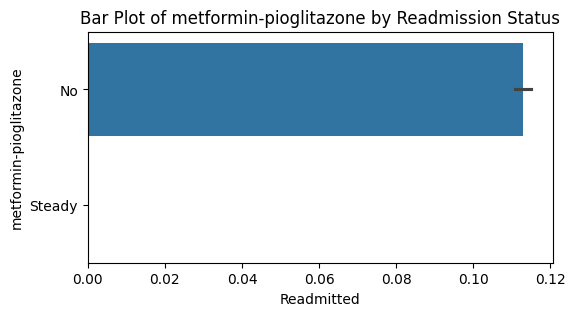

In [38]:
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

for drug in drug_cols:
    plt.figure(figsize=(6, 3))
    sns.barplot(x=df['readmitted'], y=df[drug])
    plt.title(f'Bar Plot of {drug} by Readmission Status')
    plt.xlabel('Readmitted')
    plt.ylabel(drug)
    plt.show()

# Outlier Detection and Treatment
Outlier treatment means finding and handling unusual data points that can affect results. By dealing with these outliers, we can make our data analysis more accurate.

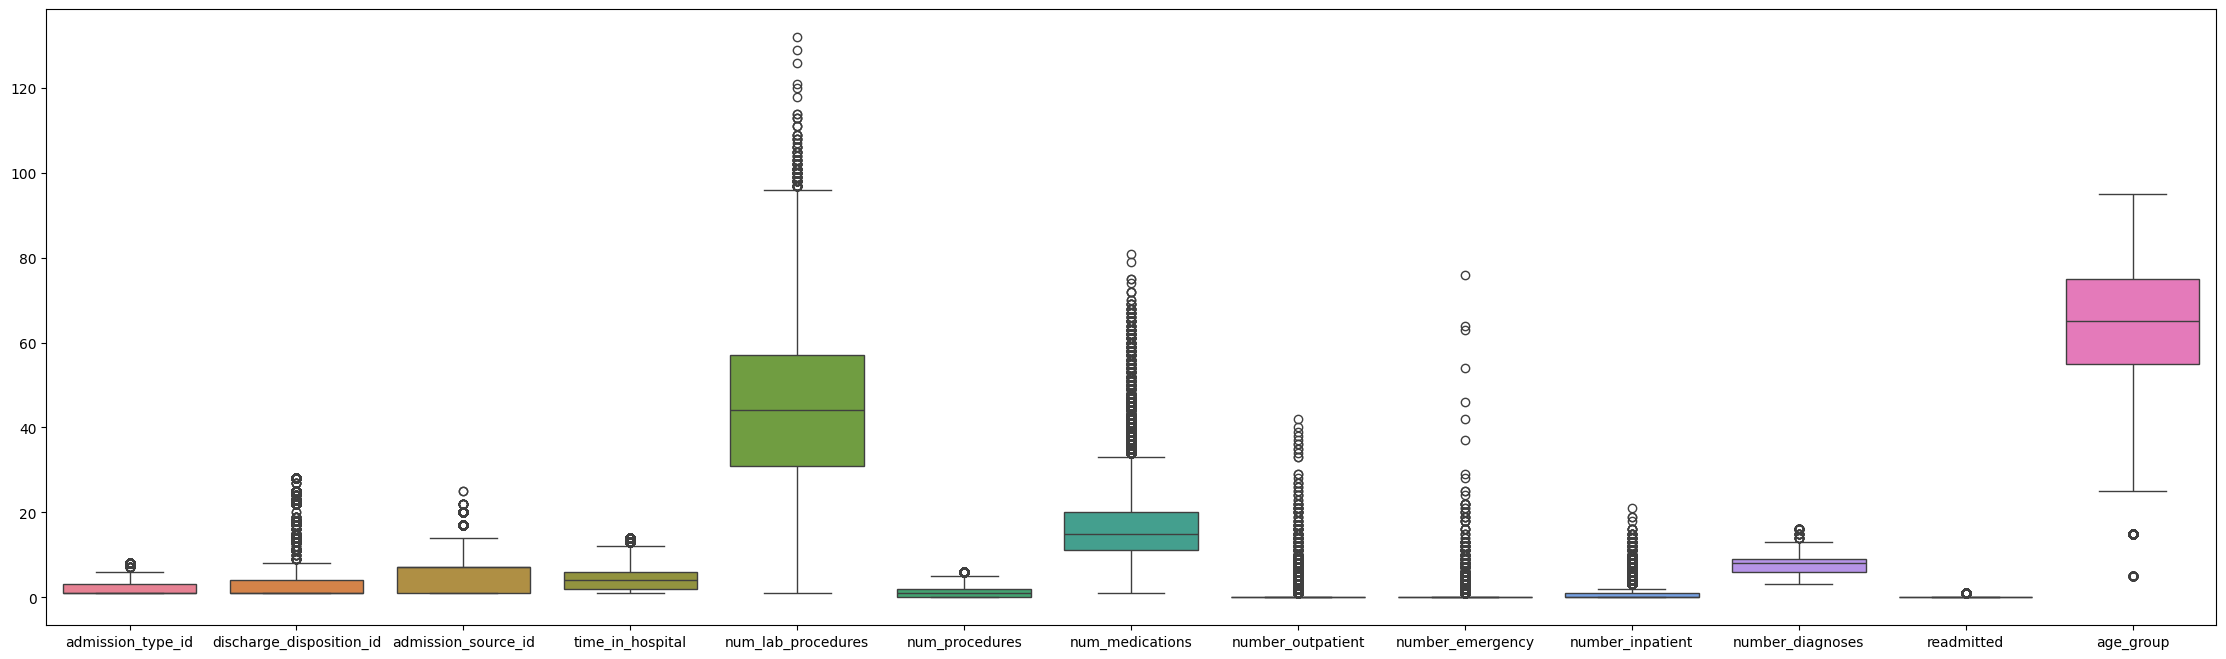

In [31]:
plt.figure(figsize=(28,8))
sns.boxplot(df)
plt.show()


In [34]:
Q3=df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
            'time_in_hospital', 'num_lab_procedures', 'num_medications', 
            'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','age_group']].quantile(0.75)
Q1=df[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
            'time_in_hospital', 'num_lab_procedures', 'num_medications', 
            'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','age_group']].quantile(0.25)
IQR=Q3-Q1
ul=Q3+(1.5*IQR)
ll=Q1-(1.5*IQR)
print(ul,ll)

time_in_hospital       12.0
num_lab_procedures     96.0
num_medications        33.5
number_outpatient       0.0
number_emergency        0.0
number_inpatient        2.5
number_diagnoses       13.5
age_group             105.0
dtype: float64 time_in_hospital      -4.0
num_lab_procedures    -8.0
num_medications       -2.5
number_outpatient      0.0
number_emergency       0.0
number_inpatient      -1.5
number_diagnoses       1.5
age_group             25.0
dtype: float64


C:\Users\rohit\AppData\Local\Temp\ipykernel_17628\567567828.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','age_group']].quantile(0.75)
C:\Users\rohit\AppData\Local\Temp\ipykernel_17628\567567828.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','age_group']].quantile(0.25)


In [36]:
outliers=[ 'time_in_hospital', 'num_lab_procedures', 'num_medications', 
            'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','age_group']
for col in outliers:
    df[col]=np.where(df[col]>ul[col],ul[col],df[col])
    df[col]=np.where(df[col]<ll[col],ll[col],df[col])


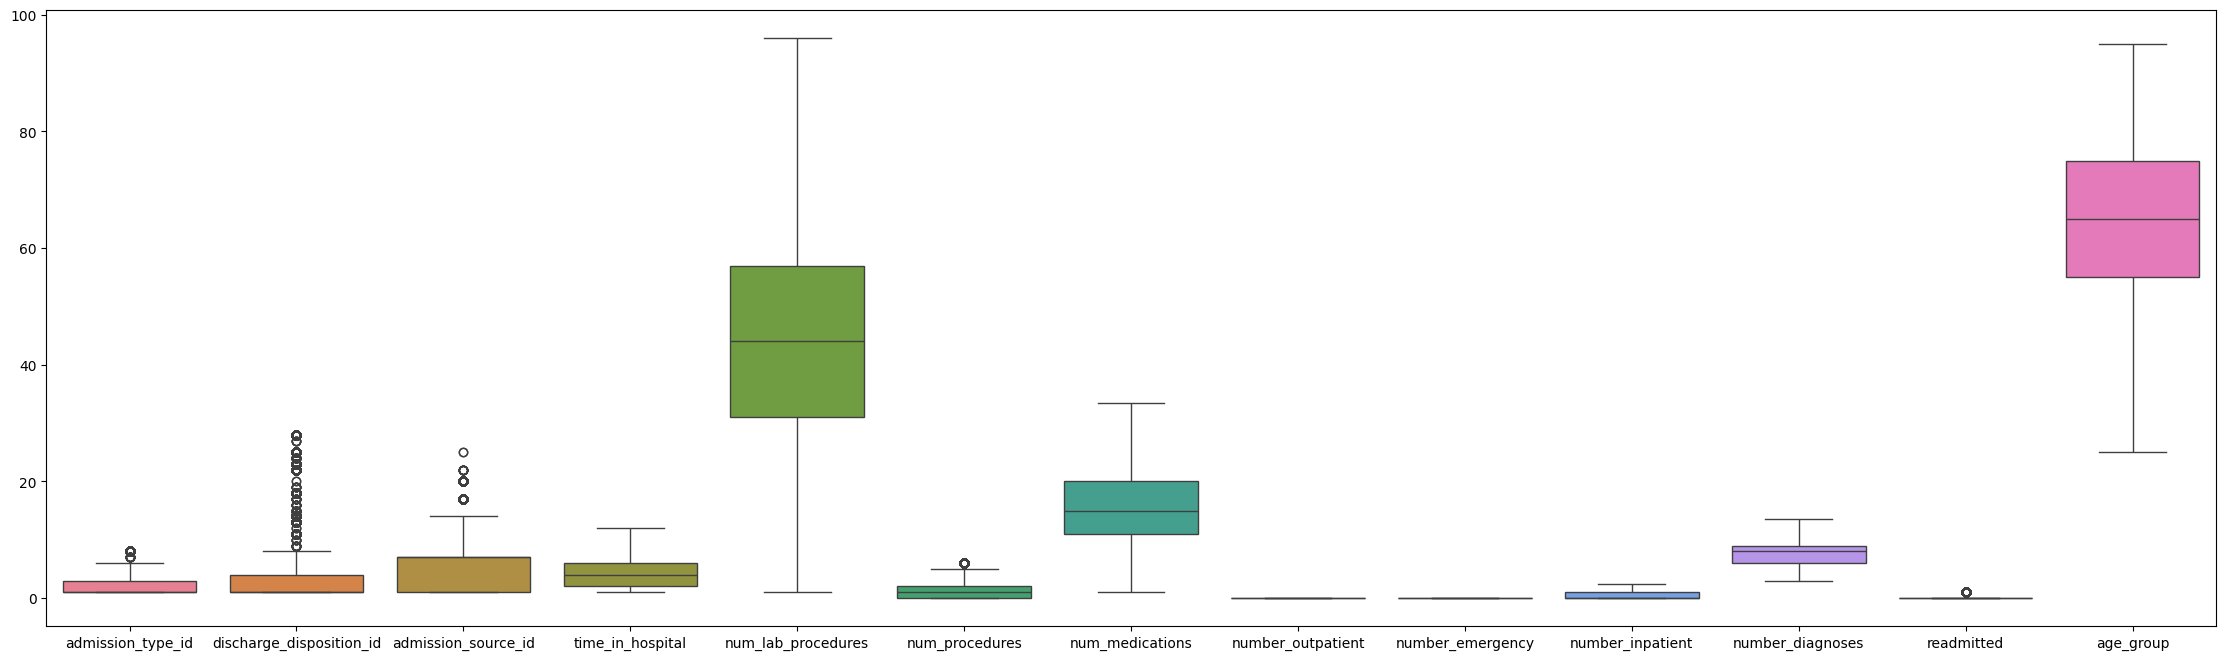

In [37]:
plt.figure(figsize=(28,8))
sns.boxplot(df)
plt.show()


In [39]:
# Custom encoding for the 21 Drug Features
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
         'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
         'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 
         'troglitazone', 'tolbutamide', 'acetohexamide']

for col in drugs:
    df[col] = df[col].replace(['No', 'Steady', 'Up', 'Down'], [0, 0, 1, 1])  # 'No' and 'Steady' as 0, 'Up' and 'Down' as 1
    df[col] = df[col].astype(int)


In [40]:
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    df[col].fillna('NaN', inplace=True)
import re
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category
for col in diag_list:
    df[col] = df[col].apply(transformFunc)
    df[col] = df[col].astype(float)

In [41]:
# A1Cresult encoding 
df['A1Cresult'] = df['A1Cresult'].replace(
    ['>7', '>8', 'Norm', 'None'],
    [1, 2, 0, -1] 
)

# max_glu_serum encoding 
df['max_glu_serum'] = df['max_glu_serum'].replace(
    ['>200', '>300', 'Norm', 'None'],
    [1, 2, 0, -1] 
)

# Convert the columns to integer type
df['A1Cresult'] = df['A1Cresult'].astype(int)
df['max_glu_serum'] = df['max_glu_serum'].astype(int)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      98052 non-null  object 
 1   gender                    98052 non-null  object 
 2   admission_type_id         98052 non-null  object 
 3   discharge_disposition_id  98052 non-null  object 
 4   admission_source_id       98052 non-null  object 
 5   time_in_hospital          98052 non-null  float64
 6   num_lab_procedures        98052 non-null  float64
 7   num_procedures            98052 non-null  int64  
 8   num_medications           98052 non-null  float64
 9   number_outpatient         98052 non-null  float64
 10  number_emergency          98052 non-null  float64
 11  number_inpatient          98052 non-null  float64
 12  diag_1                    98052 non-null  float64
 13  diag_2                    98052 non-null  float64
 14  diag_

In [43]:
#df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']


In [44]:
df_num=df.select_dtypes(include='number')
df_num.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted,age_group
1,3.0,59.0,0,18.0,0.0,0.0,0.0,276.0,250.01,255.0,...,0,0,1,0,0,0,0,0,0,25.0
2,2.0,11.0,5,13.0,0.0,0.0,1.0,648.0,250.00,0.0,...,0,0,0,0,0,0,0,0,0,25.0
3,2.0,44.0,1,16.0,0.0,0.0,0.0,8.0,250.43,403.0,...,0,0,1,0,0,0,0,0,0,35.0
4,1.0,51.0,0,8.0,0.0,0.0,0.0,197.0,157.00,250.0,...,0,0,0,0,0,0,0,0,0,45.0
5,3.0,31.0,6,16.0,0.0,0.0,0.0,414.0,411.00,250.0,...,0,0,0,0,0,0,0,0,0,55.0


In [45]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,change,diabetesMed
1,Caucasian,Female,1,1,7,Ch,Yes
2,AfricanAmerican,Female,1,1,7,No,Yes
3,Caucasian,Male,1,1,7,Ch,Yes
4,Caucasian,Male,1,1,7,Ch,Yes
5,Caucasian,Male,2,1,2,No,Yes


In [54]:
# encoding categorical variables
cat_enc=pd.get_dummies(df_cat,dtype='int',drop_first=True)
cat_enc

C:\Users\rohit\AppData\Local\Temp\ipykernel_17628\4267812608.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat_enc=pd.get_dummies(df_cat,dtype='int',drop_first=True)
C:\Users\rohit\AppData\Local\Temp\ipykernel_17628\4267812608.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat_enc=pd.get_dummies(df_cat,dtype='int',drop_first=True)
C:\Users\rohit\AppData\Local\Temp\ipykernel_17628\4267812608.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat_enc=pd.get_dummies(df_cat,dtype='int',drop_first=True)


,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,...,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,change_No,diabetesMed_Yes
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
101762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
101763,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
101764,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
final_df=pd.concat([df_num,cat_enc],axis=1)
final_df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,change_No,diabetesMed_Yes
1,3.0,59.0,0,18.0,0.0,0.0,0.0,276.00,250.01,255.0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,11.0,5,13.0,0.0,0.0,1.0,648.00,250.00,0.0,...,0,0,0,0,0,0,0,0,1,1
3,2.0,44.0,1,16.0,0.0,0.0,0.0,8.00,250.43,403.0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,51.0,0,8.0,0.0,0.0,0.0,197.00,157.00,250.0,...,0,0,0,0,0,0,0,0,0,1
5,3.0,31.0,6,16.0,0.0,0.0,0.0,414.00,411.00,250.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3.0,51.0,0,16.0,0.0,0.0,0.0,250.13,291.00,458.0,...,0,0,0,0,0,0,0,0,0,1
101762,5.0,33.0,3,18.0,0.0,0.0,1.0,560.00,276.00,787.0,...,0,0,0,0,0,0,0,0,1,1
101763,1.0,53.0,0,9.0,0.0,0.0,0.0,38.00,590.00,296.0,...,0,0,0,0,0,0,0,0,0,1
101764,10.0,45.0,2,21.0,0.0,0.0,1.0,996.00,285.00,998.0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
# Separate features and target
x = final_df.drop('readmitted', axis=1)
y = final_df['readmitted']


# Data Scaling and Splitting
Scaling is important because it helps bring all features to a similar range. I used StandardScaler to ensure that the data is in  consistent scale, which helps the model learn better.

In [49]:
# Standardize the data before splitting
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [50]:
# Split the standardized data into training and testing sets (70:30 ratio)
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, train_size=0.7, random_state=2)

In [51]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(68636, 90)
(29416, 90)
(68636,)
(29416,)


# Handling Imbalanced Data with SMOTE
Handling imbalanced data is important because it ensures that the model learns to recognize both classes equally well.I used SMOTE (Synthetic Minority Over-sampling Technique) which helps improve the model's performance on that class.

In [52]:
# Initialize SMOTE and resample the training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

# class distribution before and after resampling
print("Original class distribution in training set:", ytrain.value_counts())
print("Resampled class distribution:", pd.Series(y_resampled).value_counts())


Original class distribution in training set: 0    60847
1     7789
Name: readmitted, dtype: int64
Resampled class distribution: 1    60847
0    60847
Name: readmitted, dtype: int64


# Model Building and evaluation metrics

### Rationale for Selecting Logistic Regression
Binary Outcome: Logistic regression is perfect for predicting outcomes like hospital readmission, which can be categorized as either readmitted not readmitted.

Interpretability: The model provides clear insights into how different factors (like age or previous health conditions) affect the likelihood of readmission, making it easier to understand and explain to stakeholders.

Efficiency: Logistic regression is computationally efficient, allowing for quick training and prediction, which is important when working with large healthcare datasets.

In [53]:
# Build and train logistic regression model on resampled data
model = LogisticRegression(max_iter=1000)
model.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred = model.predict(xtest)

# Calculate evaluation metrics
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='binary')
recall = recall_score(ytest, y_pred, average='binary')
f1 = f1_score(ytest, y_pred, average='binary')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Accuracy: 0.6571
Precision: 0.1765
Recall: 0.5670
F1-Score: 0.2692


### Accuracy: 65.71% 

About 65.71% of the predictions were correct, indicating a reasonable overall performance. 

### Precision: 17.65% 

This low precision indicates that when the model predicts a patient will be readmitted, only about 17.65% of those predictions are correct. This suggests a high number of false positives, meaning the model frequently predicts readmission when it does not occur. 

### Recall: 56.70% 

The recall score indicates that the model correctly identifies about 56.70% of actual readmissions. This shows that while the model misses some readmission cases, it is somewhat effective in detecting those who are likely to be readmitted. 

### F1-Score: 26.92% 

The F1-score, which balances precision and recall, is relatively low at 26.92%. This reflects the trade-off between precision and recall, indicating that it struggles with both false positives and false negatives. 

While the model's accuracy is moderate, the low precision indicates it makes quite a few false positive predictions (predicting readmission when it doesn’t happen). However, the recall is better, meaning it does well in identifying actual readmission cases, although at the cost of some errors. 

### Conclusion: 

While logistic regression provided an interpretable and efficient model for predicting hospital readmission, addressing the class imbalance and improving feature selection could lead to better results. Ensemble methods and regularization offer potential avenues for enhancing the predictive power of the model. 